In [2]:
import numpy as np          
import matplotlib.pyplot as plt              
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

In [3]:
# load an example image from sklearn
china = load_sample_image("china.jpg")
image = np.array(china, dtype=np.float32) / 255.0

In [4]:
# reshape the image to 2D array (pixels as rows, RGB as columns)
pixel_values = image.reshape((-1, 3)) # reshape to [num_pixels, 3]

# define the number of clusters (k) and apply k-means
k = 4 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(pixel_values)

KMeans(n_clusters=4, random_state=0)

In [6]:
labels = kmeans.labels_ # cluster label for each pixel
centroids = kmeans.cluster_centers_ # RGB values for the centroids

# Map each pixel  to its cluster centroid
segmented_image = centroids[labels.flatten()] # replace each pixel with its cluster centroid
segmented_image = segmented_image.reshape(image.shape) # reshape to the original image dimensions

# next step is to calculate the positions for cluster labels
image_height, image_width, _ = image.shape
positions = []
for cluster in range(k):
    cluster_pixels = np.argwhere(labels.reshape(image_height, image_width) == cluster)
    if len(cluster_pixels) > 0:
        # claculate the mean position of pixels in the cluster
        mean_position = np.mean(cluster_pixels, axis=0).astype(int)
        positions.append((mean_position[1], mean_position[0])) # (x, y) coordinates


(np.float64(-0.5), np.float64(639.5), np.float64(426.5), np.float64(-0.5))

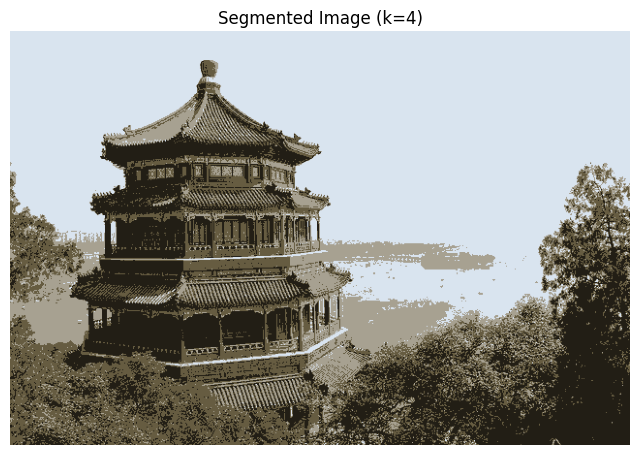

In [9]:
# next is to plot the segmented image with labels
plt.figure(figsize=(8, 8))
plt.imshow(segmented_image)
plt.title(f"Segmented Image (k={k})")
plt.axis('off')

In [17]:
# next is to add labels to the segmented image
for i, (x, y) in enumerate(positions):
    plt.text(
        x, y, f"Segment {i + 1}", color = "white", fontsize=12,
        ha = "center", va = "center", bbox = dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='black')
    )
plt.show()

ValueError: Image size of 175185x111302 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>